# Data Analysis
---
At this Jupiter Notebook you can find some analysis of primary dataset for working with classificaton/tagging task. <br>
Within this notebook you able to understand train of thought about processing source data and choosing models. 

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

import sys
import os

In [2]:
module_path = os.path.abspath(os.path.join('..')) # Path to root folder
if module_path not in sys.path:
    sys.path.append(module_path + "/scripts") # define scripts path

from ipynb_func import *

Data loader:

In [3]:
NUM = 1 # Number of data parquets to use

assert NUM >= 1 and NUM <= 9, "NUM value must be in range [1, 9]"
paths = [module_path + f"/data/pikabu/000{i}.parquet" for i in range(NUM)] # Making list of roots to merge 

data = merge_dataset(paths)

In [4]:
data.head(2)

,id,title,text_markdown,timestamp,author_id,username,rating,pluses,minuses,url,tags,blocks,comments
0,6991642,Что можно купить в Китае за цену нового iPhone...,Осенью в России стартовали продажи очередной м...,1571221527,2900955,chinatoday.ru,-4,9,13,https://pikabu.ru/story/chto_mozhno_kupit_v_ki...,"[Китай, AliExpress, Китайские товары, Бизнес, ...",{'data': ['<p>Осенью в России стартовали прода...,"{'id': [152116588, 152116426, 152114895, 15211..."
1,7178566,Последний оставшийся в живых освободитель Осве...,В канун 75-летия освобождения концлагеря и V В...,1579586602,1723707,sssr24,1339,1498,159,https://pikabu.ru/story/posledniy_ostavshiysya...,"[Великая Отечественная война, Чтобы помнили, О...",{'data': ['<p>В канун 75-летия освобождения ко...,"{'id': [159479910, 159460617, 159469842, 15947..."


In [5]:
print("Total length of dataset =", len(data))

Total length of dataset = 23000


In [6]:
""" 
It is suggested to look at the dataset, starting with the most recent posts. 
If necessary, the oldest posts can be easily ignored.
"""

data.sort_values(by=['timestamp'], inplace=True, ascending=False)
data.reset_index(inplace=True)
data.drop(['index'], axis='columns', inplace=True)
data.head(2)

,id,title,text_markdown,timestamp,author_id,username,rating,pluses,minuses,url,tags,blocks,comments
0,7455020,Gothic lolita Sunset,Сансет в платье - не путать с беконом в платье с:,1589717523,250056,Courier5995,0,0,0,https://pikabu.ru/story/gothic_lolita_sunset_7...,"[My Little Pony, Sunset Shimmer, Антро]",{'data': ['https://cs12.pikabu.ru/post_img/big...,"{'id': [], 'timestamp': [], 'parent_id': [], '..."
1,7448631,Маг и магия,,1589471283,3209857,MargOlisART,3,5,2,https://pikabu.ru/story/mag_i_magiya_7448631,"[Маг, Магия, Арт, Заклинание, Чародеи]",{'data': ['https://cs10.pikabu.ru/post_img/big...,"{'id': [169369095, 169359088], 'timestamp': [1..."


In [7]:
last_post_time = datetime.fromtimestamp(data.timestamp[0])
first_post_time = datetime.fromtimestamp(data.timestamp[len(data)-1])

print("Time of the latest post in dataset:",  last_post_time)
print("Time of the oldest post in dataset:", first_post_time)

Time of the latest post in dataset: 2020-05-17 15:12:03
Time of the oldest post in dataset: 2013-02-21 05:33:28


In [8]:
""" 
The following assumption is made:
    The greatest interest in this dataset is the collection of the following columns:
    - Post title and post content
    - Tags corresponding to the post
    - Link to post for correct debugging and comparison
 """

data = data[['title', 'text_markdown', 'url','tags']]
data.head(4)

,title,text_markdown,url,tags
0,Gothic lolita Sunset,Сансет в платье - не путать с беконом в платье с:,https://pikabu.ru/story/gothic_lolita_sunset_7...,"[My Little Pony, Sunset Shimmer, Антро]"
1,Маг и магия,,https://pikabu.ru/story/mag_i_magiya_7448631,"[Маг, Магия, Арт, Заклинание, Чародеи]"
2,"Как прыгнуть в IT, можно ли сюда гуманитариям ...","Очень круто получить хороший фидбек, учитывая ...",https://pikabu.ru/story/kak_pryignut_v_it_mozh...,"[IT, Истории, Длиннопост]"
3,Перерисованный Йоба,Ещё один перерисованный мем Йоба на случай важ...,https://pikabu.ru/story/pererisovannyiy_yoba_7...,"[Мемы, Юмор]"


In [9]:
APPEAR_AT_LEAST = 50

tg = getwordlist(data.tags)
tg_cnt = getworddict(tg, at_least=1)

assert APPEAR_AT_LEAST >= 1 and APPEAR_AT_LEAST <= max(tg_cnt.values()), f"Value must be in range [1, {max(tg_cnt.values())}]."

tg_cnt_cond = getworddict(tg, at_least=APPEAR_AT_LEAST)

print("Total number of tags in full dataset:", len(tg_cnt))
print(f"Number of tags in full dataset that appear more than {APPEAR_AT_LEAST} times: {len(tg_cnt_cond)}")
tg_cnt_cond

Total number of tags in full dataset: 19045
Number of tags in full dataset that appear more than 50 times: 225


{'Длиннопост': 5737,
 'Текст': 5198,
 'Видео': 3623,
 'Юмор': 1328,
 'Кот': 1144,
 'Фотография': 870,
 'Скриншот': 681,
 'Мат': 612,
 'Комиксы': 528,
 'Арт': 507,
 'Собака': 462,
 'Гифка': 453,
 'Политика': 434,
 'Дети': 420,
 'История': 411,
 'Без рейтинга': 408,
 'Комментарии на Пикабу': 403,
 'Россия': 387,
 'Аниме': 381,
 'Новости': 354,
 'Помощь': 351,
 'Рисунок': 336,
 'Anime Art': 333,
 'Картинка с текстом': 322,
 'Игры': 307,
 'Котомафия': 305,
 'Работа': 302,
 'Девушки': 275,
 'Реальная история из жизни': 272,
 'Негатив': 270,
 'Комментарии': 269,
 'Животные': 263,
 'Авто': 247,
 'Москва': 233,
 'Милота': 232,
 'Природа': 228,
 'Мемы': 212,
 'Музыка': 212,
 'Картинки': 211,
 'My Little Pony': 210,
 'Отношения': 208,
 'Фильмы': 208,
 'Китай': 199,
 'Санкт-Петербург': 198,
 'Рассказ': 196,
 'Своими руками': 195,
 'Украина': 185,
 'Перевод': 181,
 'Рукоделие без процесса': 179,
 'Стихи': 178,
 'Интересное': 176,
 'Школа': 176,
 'Еда': 174,
 'Путешествия': 171,
 'Вертикальное виде

In [10]:
""" 
It is also proposed to consider datasets in which the content is not empty. 
It is assumed that cells without content contain photographs/videos that are not our interest.
"""
data_with_txt = data[data.text_markdown != '']
data_with_txt.head(4)

,title,text_markdown,url,tags
0,Gothic lolita Sunset,Сансет в платье - не путать с беконом в платье с:,https://pikabu.ru/story/gothic_lolita_sunset_7...,"[My Little Pony, Sunset Shimmer, Антро]"
2,"Как прыгнуть в IT, можно ли сюда гуманитариям ...","Очень круто получить хороший фидбек, учитывая ...",https://pikabu.ru/story/kak_pryignut_v_it_mozh...,"[IT, Истории, Длиннопост]"
3,Перерисованный Йоба,Ещё один перерисованный мем Йоба на случай важ...,https://pikabu.ru/story/pererisovannyiy_yoba_7...,"[Мемы, Юмор]"
4,"Безнадёжный киберстранник из Москвы, 24 оборот...",Интересуют дружеские взаимоотношения построенн...,https://pikabu.ru/story/beznadyozhnyiy_kiberst...,"[Друзья-Лз, Москва, Длиннопост, 18-25 лет, Муж..."


In [11]:
et_tg = getwordlist(data_with_txt.tags)
et_tg_cnt = getworddict(et_tg, at_least=1)
et_tg_cnt_cond = getworddict(et_tg, at_least=APPEAR_AT_LEAST)

print("Total number of tags in dataset with no missing text fields:", len(et_tg_cnt))
print(f"Number of tags in dataset with no missing text fields that appear more than {APPEAR_AT_LEAST} times: {len(et_tg_cnt_cond)}")
et_tg_cnt_cond

Total number of tags in dataset with no missing text fields: 15539
Number of tags in dataset with no missing text fields that appear more than 50 times: 153


{'Текст': 5180,
 'Длиннопост': 5081,
 'Видео': 2025,
 'Юмор': 701,
 'Кот': 602,
 'Мат': 554,
 'Фотография': 491,
 'Скриншот': 411,
 'Без рейтинга': 400,
 'История': 384,
 'Комментарии на Пикабу': 360,
 'Политика': 346,
 'Комиксы': 338,
 'Помощь': 329,
 'Новости': 316,
 'Дети': 316,
 'Арт': 299,
 'Россия': 298,
 'Реальная история из жизни': 270,
 'Работа': 260,
 'Собака': 248,
 'Негатив': 246,
 'Игры': 219,
 'Аниме': 211,
 'Anime Art': 207,
 'Москва': 205,
 'Рассказ': 193,
 'My Little Pony': 180,
 'Рисунок': 179,
 'Котомафия': 172,
 'Фильмы': 171,
 'Комментарии': 171,
 'Отношения': 167,
 'Стихи': 163,
 'Санкт-Петербург': 160,
 'Рукоделие без процесса': 157,
 'Своими руками': 155,
 'Путешествия': 155,
 'Музыка': 153,
 'Гифка': 153,
 'Авто': 152,
 'Медицина': 151,
 'Школа': 150,
 'Перевод': 148,
 'Животные': 146,
 'Вопрос': 146,
 'Природа': 144,
 'Мошенники': 141,
 'Девушки': 137,
 'Жизнь': 136,
 'Компьютерные игры': 134,
 'Китай': 133,
 'СССР': 133,
 'Семья': 132,
 'Еда': 132,
 'Ответ на

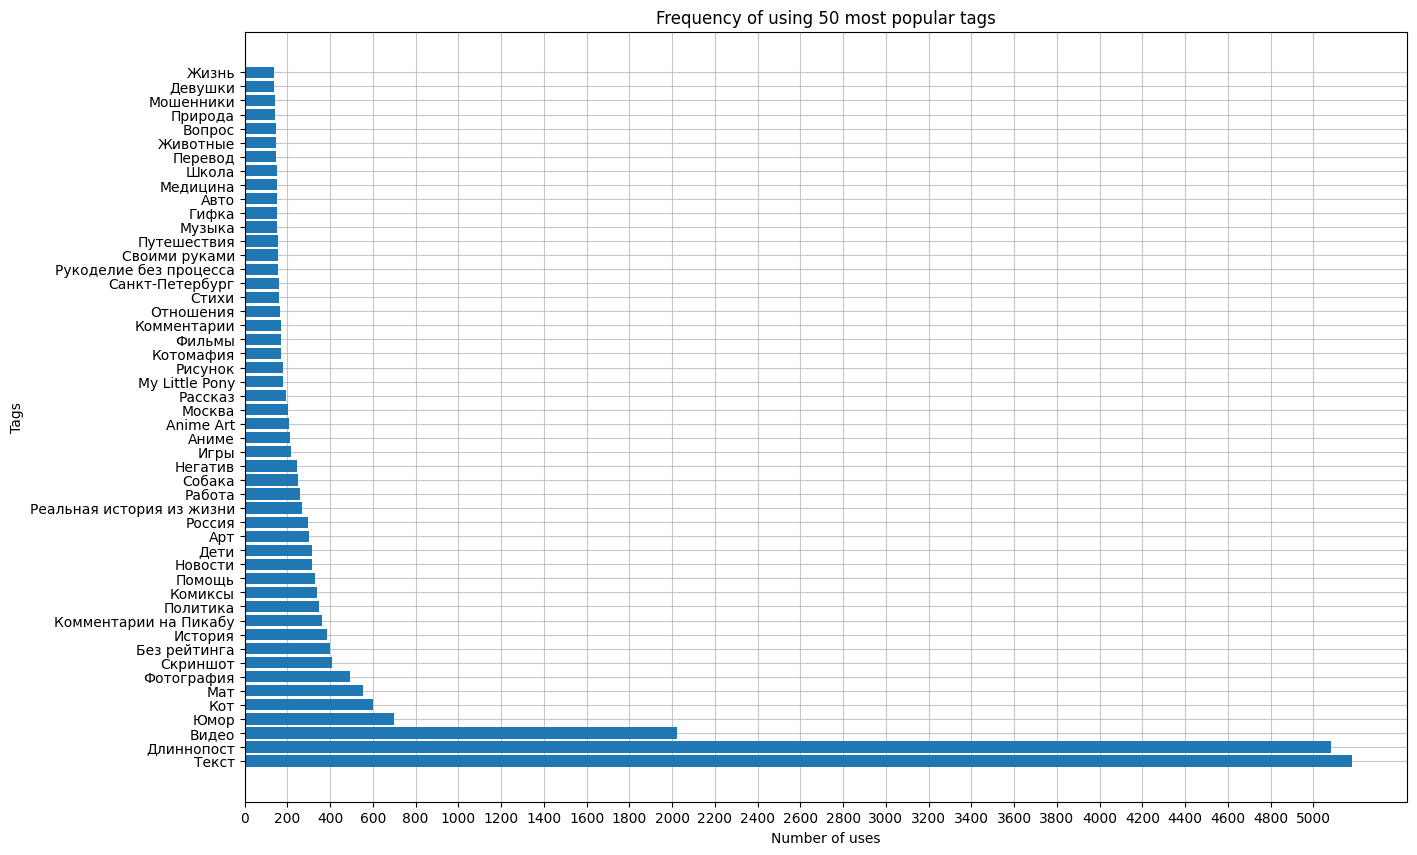

In [12]:
word = list(et_tg_cnt_cond.keys())
count = list(et_tg_cnt_cond.values())

N_MOST_POPULAR = 50 # Set the value based on how many top tags you want to receive

assert N_MOST_POPULAR <= len(count) and N_MOST_POPULAR > 0, f"N_MOST_POPULAR value must be in range [1, {len(count)}]."

fig, ax = plt.subplots(figsize=(15,10))

ax.grid(zorder=1, alpha=0.7)
ax.barh(word[0:N_MOST_POPULAR], count[0:N_MOST_POPULAR], zorder=2)
ax.set_xticks(np.arange(0, max(count), 200))
ax.set_xlabel("Number of uses")
ax.set_ylabel("Tags")
ax.set_title(f"Frequency of using {N_MOST_POPULAR} most popular tags");

In [13]:
# Problematic tags:
bad_tags = ['Фотография', 'Видео', 'Скриншот', 'Anime Art', 'Гифка', 'Арт', 'Рисунок']
tags_to_remove = ['Длиннопост', 'Текст', 'Без рейтинга', 'Ответ на пост', 'Комментарии'] # not problematic, but tags, that are not in our interests?

# Top {N_MOST_POPULAR} tags
top_tags = word[0:N_MOST_POPULAR]

Save top `N_MOST_POPULAR` into file for future use:

In [14]:
txt_path = module_path + '/data/'
with open(txt_path + 'top_tags.txt', 'w') as f:
    for line in top_tags:
        f.write(line)
        f.write('\n')